In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn as sk

In [2]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df['total'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
df2=df[['InvoiceDate', 'total']]

df2.head()

,InvoiceDate,total
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [6]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [18]:
train_start = '2010-12-01'
train_end = '2011-08-31'  # End of training period

test_start = '2011-09-01'  # Start of testing period
test_end = '2011-12-09'  # End of testing period

forecast_start = '2011-12-10'  # Start of forecast period
forecast_end = '2012-02-01'  # End of forecast period

In [24]:
# Print the minimum and maximum dates in df2
print(df2.index.min())
print(df2.index.max())

2010-12-01 00:00:00
2011-12-09 00:00:00


(array([14944., 14975., 15006., 15034., 15065., 15095., 15126., 15156.,
        15187., 15218., 15248., 15279., 15309.]),
 [Text(14944.0, 0, 'Dec 2010'),
  Text(14975.0, 0, 'Jan 2011'),
  Text(15006.0, 0, 'Feb 2011'),
  Text(15034.0, 0, 'Mar 2011'),
  Text(15065.0, 0, 'Apr 2011'),
  Text(15095.0, 0, 'May 2011'),
  Text(15126.0, 0, 'Jun 2011'),
  Text(15156.0, 0, 'Jul 2011'),
  Text(15187.0, 0, 'Aug 2011'),
  Text(15218.0, 0, 'Sep 2011'),
  Text(15248.0, 0, 'Oct 2011'),
  Text(15279.0, 0, 'Nov 2011'),
  Text(15309.0, 0, 'Dec 2011')])

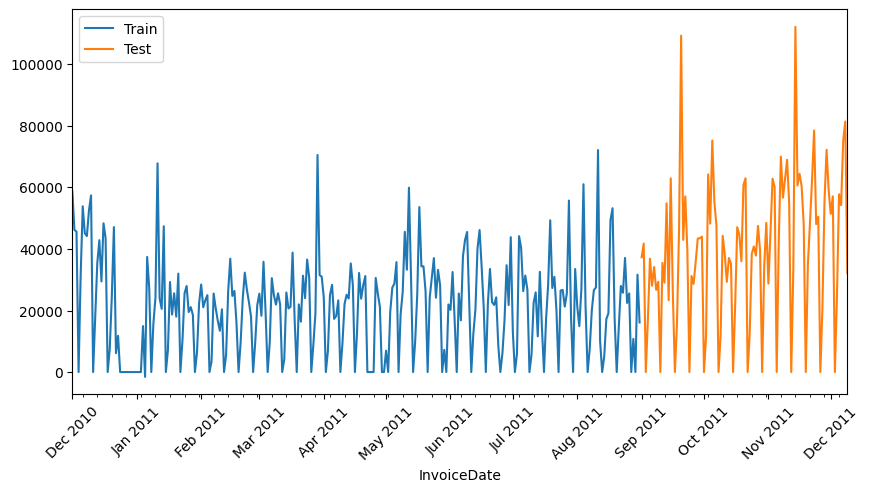

In [27]:
import matplotlib.dates as mdates

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
df2.loc[train_start:train_end, 'total'].plot(ax=ax, label = "Train")
df2.loc[test_start:test_end, 'total'].plot(ax=ax, label = "Test")
ax.legend()

# Set major x-axis ticks to show the first day of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Set major x-axis labels to show the month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)


In [9]:
try:
    from sklearn.tree import DecisionTreeRegressor
    print("DecisionTreeRegressor found! You can use it.")
except ImportError:
    print("DecisionTreeRegressor not found. Please check your scikit-learn installation.")


DecisionTreeRegressor found! You can use it.


In [28]:
# Calculate total purchases for each customer
clv = df.groupby('CustomerID')['total'].sum()

# Display the top 10 customers with the highest CLV
print(clv.sort_values(ascending=False).head(10))

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: total, dtype: float64


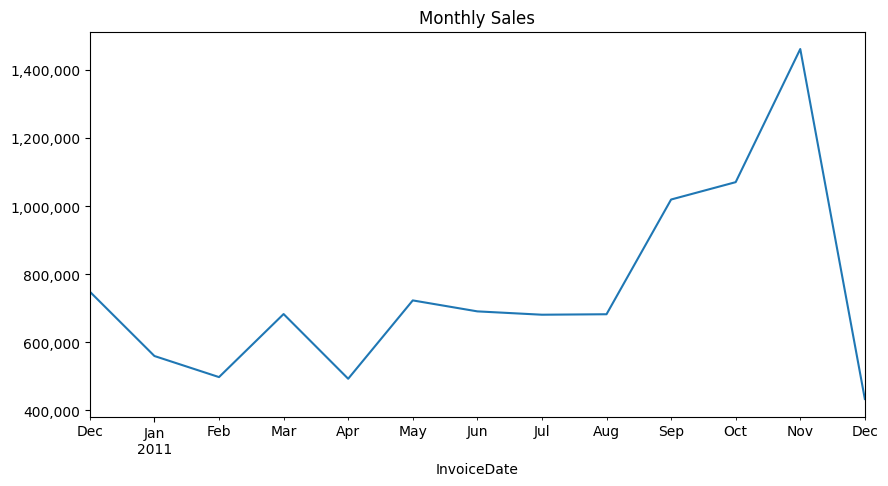

In [33]:
import matplotlib.ticker as ticker

# Resample the data to monthly frequency and calculate total sales for each month
monthly_sales = df.resample('M', on='InvoiceDate')['total'].sum()

# Plot the monthly sales
ax = monthly_sales.plot(figsize=(10, 5))
plt.title('Monthly Sales')

# Format y-axis labels to use plain numbers
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [34]:
# Define a cutoff date. Customers who haven't made a purchase after this date are considered churned
cutoff_date = df['InvoiceDate'].max() - pd.DateOffset(months=3)

# Create a new DataFrame with CustomerID and whether they have churned
df_churn = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_churn['Churned'] = df_churn['InvoiceDate'] < cutoff_date

# Print the first few rows of df_churn
print(df_churn.head())

   CustomerID         InvoiceDate  Churned
0     12346.0 2011-01-18 10:17:00     True
1     12347.0 2011-12-07 15:52:00    False
2     12348.0 2011-09-25 13:13:00    False
3     12349.0 2011-11-21 09:51:00    False
4     12350.0 2011-02-02 16:01:00     True


In [37]:
# Count the number of churned and retained customers
# churn_counts = df_churn['Churned'].value_counts()

# Create a bar plot
# churn_counts.plot(kind='bar', figsize=(8, 6))
# plt.title('Customer Churn')
# plt.xlabel('Churned')
# plt.ylabel('Number of Customers')
# plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)  # Replace 0/1 with 'Retained'/'Churned'
# plt.show()

# this is bar chart

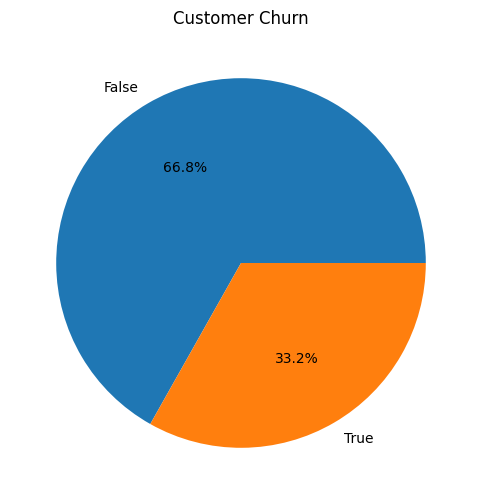

In [38]:
# Count the number of churned and retained customers
churn_counts = df_churn['Churned'].value_counts()

# Create a pie chart
churn_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 6))
plt.title('Customer Churn')
plt.ylabel('')  # Hide the y-axis label
plt.show()